In [54]:
library(lme4)
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [4]:
?read.csv

In [21]:
metab_filt <- read.csv('..\\data\\processed\\metabolomics_msdial_imputed_filtered.csv',
                       sep=',')

In [24]:
?concat

In [22]:
concat(metab_filt)

X,X6,X10,X11,X12,X13,X21,X25,X27,X30,...,X18198,X18199,X18200,X18201,X18202,X18203,X18204,X18205,X18210,X18211
20210831_KAO_HILIC_ACN_20210831232610,15.353595,15.47060,14.819081,15.29500,16.63829,18.95612,15.54216,17.20388,19.42157,...,21.24550,19.12801,16.22521,25.04211,24.97095,22.65756,23.42431,20.80681,16.05911,16.78885
20210831_KAO_HILIC_extraction_blank_1,8.933691,14.21303,9.567956,14.91135,15.32059,17.20822,13.80383,18.65397,18.42032,...,21.25599,18.95968,16.47103,25.35253,24.97095,23.04138,23.39140,21.41948,16.11013,16.67032
20210831_KAO_HILIC_human_plasma_1,20.786999,18.51454,20.270186,13.95429,15.22498,17.63260,18.47509,16.86590,19.74837,...,21.90034,19.21911,19.89472,25.56308,25.56308,23.65515,23.65515,22.23058,15.47348,13.16961
20210831_KAO_HILIC_human_plasma_2,20.275149,18.62325,20.861016,16.29345,14.59380,20.14466,17.31354,19.79577,21.43687,...,21.02684,19.35311,19.31902,24.50230,24.77795,22.49862,22.76975,20.96363,13.80715,15.24704
20210831_KAO_HILIC_human_plasma_3,21.064804,18.77091,20.431166,12.23332,14.87647,17.49824,19.08251,20.53624,19.89877,...,20.93829,19.74534,16.90691,24.52070,24.79544,22.78280,22.51558,20.89345,13.83625,15.97681
20210831_KAO_HILIC_human_plasma_4,21.161065,19.12530,20.579585,16.82960,10.41680,18.10765,19.78277,20.32030,19.79385,...,21.28373,19.61354,19.34642,24.75263,25.01602,23.04384,22.78320,21.25928,14.30052,16.25880
20210831_KAO_HILIC_human_plasma_5,21.184800,18.88459,20.566415,16.35056,15.92075,18.01528,19.79332,20.83546,20.83102,...,21.03814,19.60639,16.81173,24.71146,24.97632,23.07149,22.82167,21.46244,14.03956,15.68490
20210831_KAO_HILIC_T1060M_20210322_8wk_FBG,17.054986,22.50483,15.743020,17.52036,18.23322,17.93296,16.47136,20.97283,19.83441,...,19.88215,17.72475,15.98003,24.28738,23.93790,21.24124,21.48059,19.55917,18.05650,16.37453
20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,18.908463,23.22686,18.908463,16.67768,18.55904,17.58742,19.83542,18.34299,20.83584,...,19.42948,18.47425,17.11000,23.25621,22.96763,20.53327,20.78890,18.21576,16.54781,16.52514
20210831_KAO_HILIC_T1060M_20210329_9wk_FBG,17.772373,22.79326,18.169749,18.86904,18.11700,19.73618,18.08009,20.68948,21.95464,...,20.06702,17.36429,16.28499,23.88001,24.22606,21.67937,21.42549,19.15129,17.98629,16.69084


In [29]:
test <- lm(X6 ~ X30, data=metab_filt)

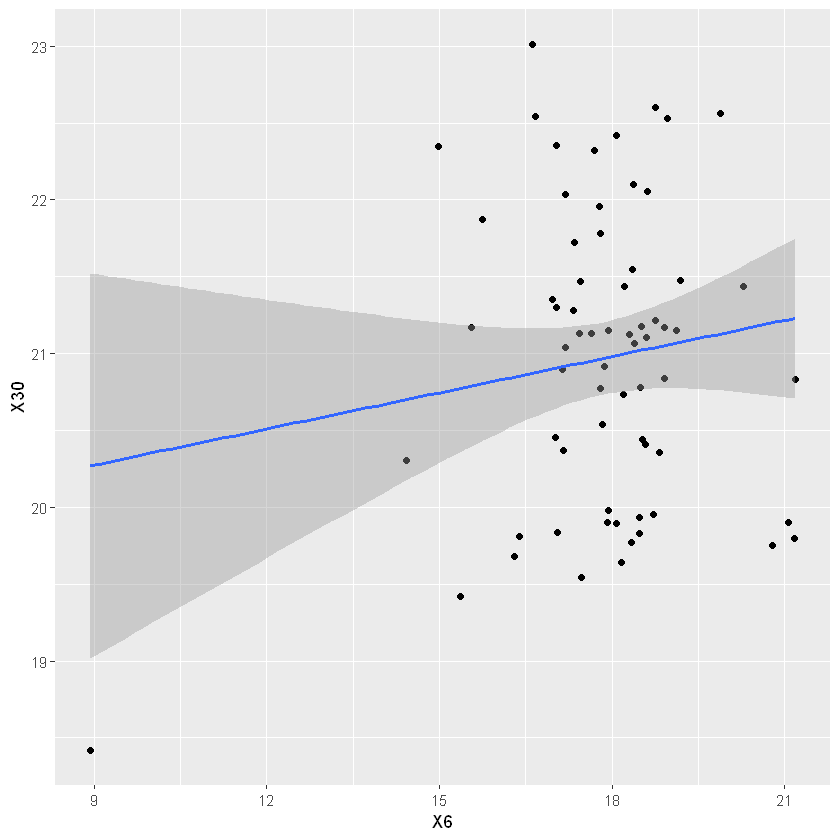

In [30]:
(prelim_plot <- ggplot(metab_filt, aes(x = X6, y = X30)) +
  geom_point() +
  geom_smooth(method = "lm"))

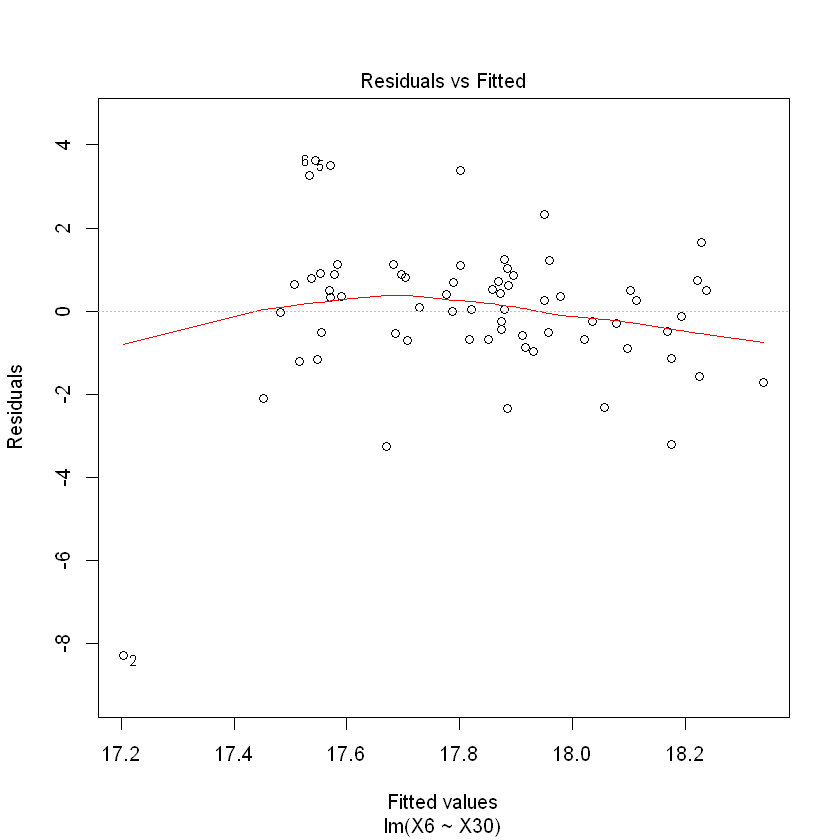

In [39]:
# Plot residuals from the fitted model using which=1


plot(test, which=1)

In [53]:
select(metab_filt, X10)

ERROR: Error in select(metab_filt, X10): could not find function "select"


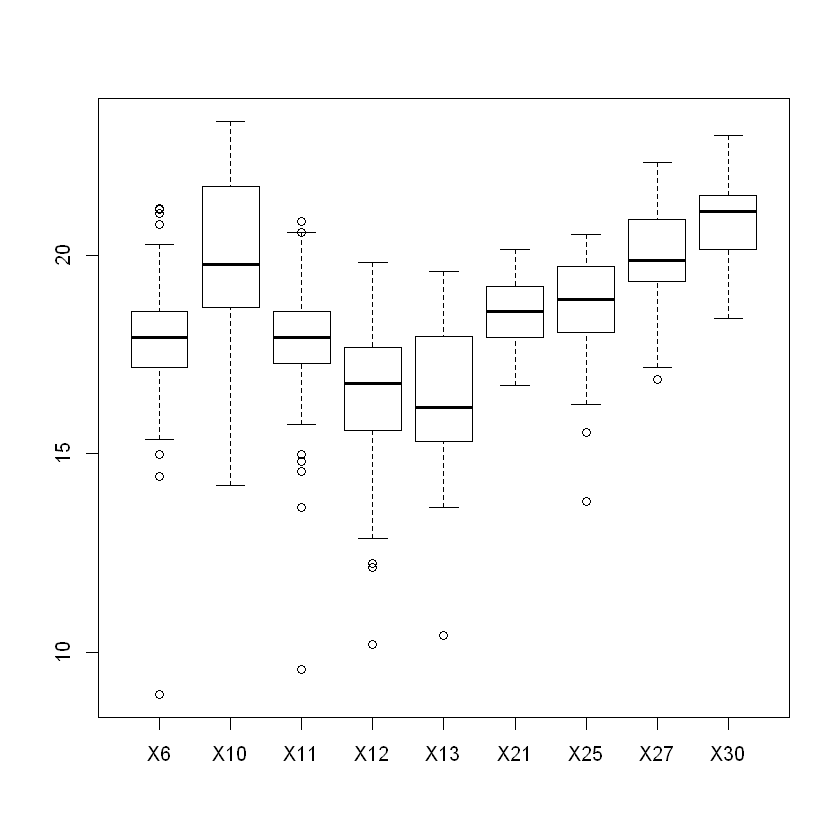

In [58]:
boxplot(select(metab_filt, X6: X30))

In [35]:
?plot

In [23]:
colnames(metab_filt)

[1] "X"      "X6"     "X10"    "X11"    "X12"    "X13"    "X21"    "X25"   
   [9] "X27"    "X30"    "X32"    "X33"    "X36"    "X39"    "X42"    "X44"   
  [17] "X45"    "X76"    "X77"    "X79"    "X83"    "X87"    "X99"    "X100"  
  [25] "X102"   "X107"   "X111"   "X116"   "X122"   "X124"   "X129"   "X130"  
  [33] "X133"   "X135"   "X136"   "X138"   "X140"   "X141"   "X142"   "X143"  
  [41] "X145"   "X186"   "X188"   "X189"   "X191"   "X193"   "X194"   "X195"  
  [49] "X196"   "X197"   "X198"   "X199"   "X200"   "X205"   "X207"   "X208"  
  [57] "X209"   "X212"   "X214"   "X215"   "X216"   "X218"   "X220"   "X222"  
  [65] "X223"   "X224"   "X238"   "X242"   "X243"   "X252"   "X258"   "X259"  
  [73] "X267"   "X270"   "X271"   "X272"   "X273"   "X274"   "X277"   "X279"  
  [81] "X280"   "X281"   "X282"   "X283"   "X284"   "X288"   "X309"   "X311"  
  [89] "X312"   "X313"   "X314"   "X319"   "X320"   "X321"   "X323"   "X324"  
  [97] "X326"   "X332"   "X339"   "X343"   "X349"   "X359"   "X360"   "X362"  
 [105] "X366"   "X367"   "X371"   "X377"   "X378"   "X379"   "X380"   "X381"  
 [113] "X383"   "X385"   "X386"   "X387"   "X388"   "X392"   "X394"   "X407"  
 [121] "X414"   "X442"   "X443"   "X456"   "X457"   "X472"   "X475"   "X504"  
 [129] "X516"   "X522"   "X523"   "X524"   "X525"   "X526"   "X527"   "X528"  
 [137] "X529"   "X534"   "X537"   "X544"   "X548"   "X549"   "X550"   "X553"  
 [145] "X554"   "X555"   "X557"   "X560"   "X561"   "X563"   "X566"   "X568"  
 [153] "X585"   "X586"   "X593"   "X597"   "X598"   "X600"   "X601"   "X603"  
 [161] "X616"   "X626"   "X628"   "X638"   "X640"   "X643"   "X644"   "X645"  
 [169] "X666"   "X667"   "X668"   "X669"   "X670"   "X673"   "X675"   "X677"  
 [177] "X684"   "X692"   "X693"   "X694"   "X695"   "X696"   "X697"   "X698"  
 [185] "X699"   "X700"   "X725"   "X726"   "X727"   "X731"   "X733"   "X747"  
 [193] "X764"   "X765"   "X766"   "X770"   "X771"   "X776"   "X780"   "X787"  
 [201] "X797"   "X807"   "X808"   "X811"   "X812"   "X813"   "X818"   "X819"  
 [209] "X822"   "X823"   "X826"   "X829"   "X830"   "X837"   "X842"   "X846"  
 [217] "X856"   "X860"   "X863"   "X864"   "X865"   "X867"   "X868"   "X871"  
 [225] "X872"   "X874"   "X878"   "X879"   "X880"   "X885"   "X897"   "X902"  
 [233] "X903"   "X904"   "X905"   "X910"   "X912"   "X915"   "X922"   "X924"  
 [241] "X934"   "X935"   "X944"   "X947"   "X956"   "X957"   "X960"   "X966"  
 [249] "X979"   "X980"   "X996"   "X997"   "X1001"  "X1011"  "X1013"  "X1038" 
 [257] "X1042"  "X1048"  "X1049"  "X1071"  "X1101"  "X1102"  "X1103"  "X1105" 
 [265] "X1106"  "X1108"  "X1110"  "X1114"  "X1120"  "X1123"  "X1126"  "X1132" 
 [273] "X1139"  "X1145"  "X1151"  "X1153"  "X1154"  "X1155"  "X1157"  "X1162" 
 [281] "X1167"  "X1168"  "X1198"  "X1201"  "X1202"  "X1203"  "X1206"  "X1207" 
 [289] "X1208"  "X1210"  "X1211"  "X1212"  "X1213"  "X1216"  "X1218"  "X1219" 
 [297] "X1220"  "X1225"  "X1227"  "X1228"  "X1229"  "X1230"  "X1233"  "X1238" 
 [305] "X1259"  "X1260"  "X1261"  "X1262"  "X1263"  "X1264"  "X1265"  "X1292" 
 [313] "X1293"  "X1307"  "X1313"  "X1318"  "X1320"  "X1324"  "X1325"  "X1335" 
 [321] "X1337"  "X1340"  "X1348"  "X1349"  "X1350"  "X1352"  "X1364"  "X1365" 
 [329] "X1367"  "X1374"  "X1384"  "X1409"  "X1410"  "X1413"  "X1414"  "X1415" 
 [337] "X1416"  "X1419"  "X1426"  "X1430"  "X1434"  "X1435"  "X1436"  "X1441" 
 [345] "X1444"  "X1450"  "X1453"  "X1455"  "X1462"  "X1465"  "X1470"  "X1482" 
 [353] "X1488"  "X1497"  "X1512"  "X1519"  "X1525"  "X1528"  "X1529"  "X1530" 
 [361] "X1532"  "X1534"  "X1536"  "X1549"  "X1554"  "X1555"  "X1558"  "X1560" 
 [369] "X1582"  "X1587"  "X1588"  "X1601"  "X1603"  "X1605"  "X1606"  "X1608" 
 [377] "X1612"  "X1614"  "X1615"  "X1617"  "X1618"  "X1622"  "X1624"  "X1625" 
 [385] "X1628"  "X1630"  "X1639"  "X1642"  "X1655"  "X1656"  "X1657"  "X1658" 
 [393] "X1660"  "X1661"  "X1665"  "X1669"  "X1677"  "X1680"  "X1687"  "X1702" 
 [401] "X1707"  "X1712"  "X1735"  "X1741"  "X1742"  "

In [15]:
hist(metab_filt$Average.Rt.min.)

ERROR: Error in hist.default(metab_filt$Average.Rt.min.): 'x' must be numeric


In [10]:
getRversion()

[1] '3.6.1'

In [12]:
library('devtools')

ERROR: Error in library("devtools"): there is no package called 'devtools'


In [ ]:
feature1 ~ OGTT * df.BG_type + 